In [1]:
path = "../data/"
csvfile = "diet_growth_30days_Fig5.csv"

#import pandas
import pandas as pd
# import matplotlib
import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline
df = pd.read_csv(path+csvfile)
print(df)
df.head()
df.info()

     Individual              Diet Abbreviation  #_segments  growth rate
0             1  single_microalga      G.micro          16     0.533333
1             2  single_microalga      G.micro          19     0.633333
2             3  single_microalga      G.micro          12     0.400000
3             4  single_microalga      G.micro          14     0.466667
4             5  single_microalga      G.micro          13     0.433333
..          ...               ...          ...         ...          ...
702         703      5mix_2diatom     Mix_5sp.          18     0.600000
703         704      5mix_2diatom     Mix_5sp.          27     0.900000
704         705      5mix_2diatom     Mix_5sp.          22     0.733333
705         706      5mix_2diatom     Mix_5sp.          16     0.533333
706         707      5mix_2diatom     Mix_5sp.          20     0.666667

[707 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 5 columns):
 #   Col

In [2]:
#Run a Shapiro-Wilks test on data to check distribution
#import libraries needed
import numpy as np
from scipy.stats import shapiro
from numpy.random import random

#Conduct the Shapiro-Wilk Test
shapiroresult = shapiro(df["#_segments"])
#The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05. We can state with 95% confidence that the data does NOT fit the normal distribution.

print(shapiroresult)

#Conduct the Shapiro-Wilk Test
shapiroresult2 = shapiro(df["growth rate"])
#The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05. We can state with 95% confidence that the data does NOT fit the normal distribution.

print(shapiroresult2)

#as p-value is under 0.05, we consider the data to be not normally distributed, and will apply non-parametric tests, as with our other data sets.

ShapiroResult(statistic=0.981946587562561, pvalue=1.1872133853785272e-07)
ShapiroResult(statistic=0.981946587562561, pvalue=1.1872133853785272e-07)


In [3]:
#do Kruskal-Wallis Test to check if significant difference between different groups segment numbers at 30days.. Shapiro-Wilks test suggests data is not normally distributed.
#We are interest in '#_segments'
import scipy.stats as stats

kruskalgroup=stats.kruskal(df["#_segments"][df["Abbreviation"] == "G.micro"],
               df["#_segments"][df["Abbreviation"] == "diatom"],
                df["#_segments"][df["Abbreviation"] == "Mix_3sp."],
                df["#_segments"][df["Abbreviation"] == "Mix_5sp."])
print(kruskalgroup)
#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp

datagroup = [df["#_segments"][df["Abbreviation"] == "G.micro"], df["#_segments"][df["Abbreviation"] == "diatom"], df["#_segments"][df["Abbreviation"] == "Mix_3sp."], df["#_segments"][df["Abbreviation"] == "Mix_5sp."]]
p_values = sp.posthoc_dunn(datagroup, p_adjust = 'bonferroni')
print(p_values)

p_values < 0.05
#KruskalResult(statistic=200.36186510010765, pvalue=3.5234892278397045e-43)
#results show individual diatom causes sig more growth, and mixtures with diatom more again. 
#But there is no difference in growth on 3sp mix vs 5sp mix, so one diatom species may be enough to supplement microalgae

KruskalResult(statistic=200.36186510010765, pvalue=3.5234892278397045e-43)
              1             2             3             4
1  1.000000e+00  1.761871e-04  1.062757e-31  7.727772e-33
2  1.761871e-04  1.000000e+00  6.957853e-10  7.847709e-12
3  1.062757e-31  6.957853e-10  1.000000e+00  1.000000e+00
4  7.727772e-33  7.847709e-12  1.000000e+00  1.000000e+00


,1,2,3,4
1,False,True,True,True
2,True,False,True,True
3,True,True,False,False
4,True,True,False,False


In [4]:
#do Kruskal-Wallis Test to check if significant difference between different groups growth rate over 30days.. Shapiro-Wilks test suggests data is not normally distributed.
#We are interest in 'growth rate'
import scipy.stats as stats

kruskalgroup2=stats.kruskal(df["growth rate"][df["Abbreviation"] == "G.micro"],
               df["growth rate"][df["Abbreviation"] == "diatom"],
                df["growth rate"][df["Abbreviation"] == "Mix_3sp."],
                df["growth rate"][df["Abbreviation"] == "Mix_5sp."])
print(kruskalgroup2)
#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp

datagroup2 = [df["growth rate"][df["Abbreviation"] == "G.micro"], df["growth rate"][df["Abbreviation"] == "diatom"], df["growth rate"][df["Abbreviation"] == "Mix_3sp."], df["growth rate"][df["Abbreviation"] == "Mix_5sp."]]
p_values2 = sp.posthoc_dunn(datagroup2, p_adjust = 'bonferroni')
print(p_values2)

p_values2 < 0.05
#KruskalResult(statistic=200.36186510010765, pvalue=3.5234892278397045e-43)
#results show individual diatom causes sig faster growth, and mixtures with diatom more again. 
#But there is no difference in growth on 3sp mix vs 5sp mix, so one diatom species may be enough to supplement microalgae

KruskalResult(statistic=200.36186510010765, pvalue=3.5234892278397045e-43)
              1             2             3             4
1  1.000000e+00  1.761871e-04  1.062757e-31  7.727772e-33
2  1.761871e-04  1.000000e+00  6.957853e-10  7.847709e-12
3  1.062757e-31  6.957853e-10  1.000000e+00  1.000000e+00
4  7.727772e-33  7.847709e-12  1.000000e+00  1.000000e+00


,1,2,3,4
1,False,True,True,True
2,True,False,True,True
3,True,True,False,False
4,True,True,False,False


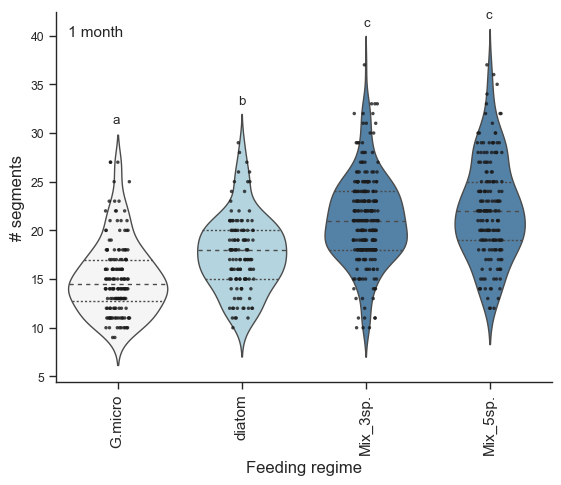

In [7]:
# color palette as dictionary
palette = {"G.micro":"whitesmoke",
           "diatom":"lightblue", 
           "Mix_3sp.":"steelblue",
          "Mix_5sp.":"steelblue"}

#% settlement alive at 24h after induction
plot1 = sns.violinplot(data=df, x="Abbreviation", y="#_segments", linewidth=1.0, 
                    palette=palette, 
                    inner="quart", fill=False, alpha=0.1)
plot1 = sns.stripplot(data=df, x='Abbreviation', y="#_segments", jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, color="k")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, fontsize=11)
plot1.set_ylabel("# segments", fontsize=12)
plot1.set_xlabel("Feeding regime", fontsize=12)
# Text annotation based on Kruskal-Wallis test with Dunn's posthoc testing at x = 2, y = 1.75           
plot1.text(-0.04, 31, "a")
plot1.text(0.97, 33, "b")
plot1.text(1.98, 41, "c")
plot1.text(2.97, 41.8, "c")
plot1.text(-0.4, 40.0, "1 month", fontsize=11) #addtext

sns.despine()
sns.set(font="Arial")
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1)

#Export graph to svg file
plt.savefig("../output/Figure5.svg", bbox_inches='tight')
plt.savefig("../output/Figure5.png", bbox_inches='tight')